<a href="https://colab.research.google.com/github/Sha-diya/DataCollection-/blob/main/FeatureScaling/Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Normalization works to change the unit of the numeric value so that they are on the same unit.


In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['Class_label','Alcohol','Malic_acid']

In [5]:
df.head()

,Class_label,Alcohol,Malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

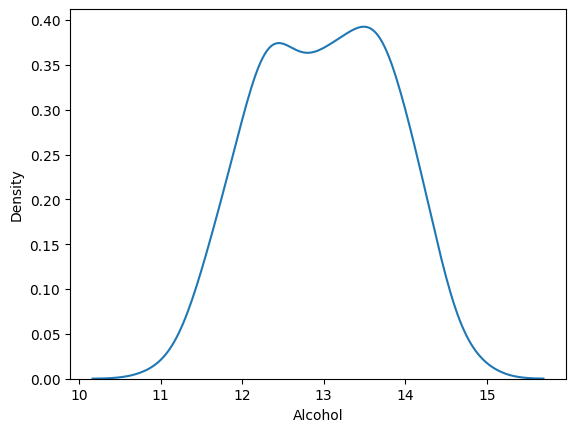

In [6]:
sns.kdeplot(df['Alcohol']) #Distplot(PDF)

<Axes: xlabel='Malic_acid', ylabel='Density'>

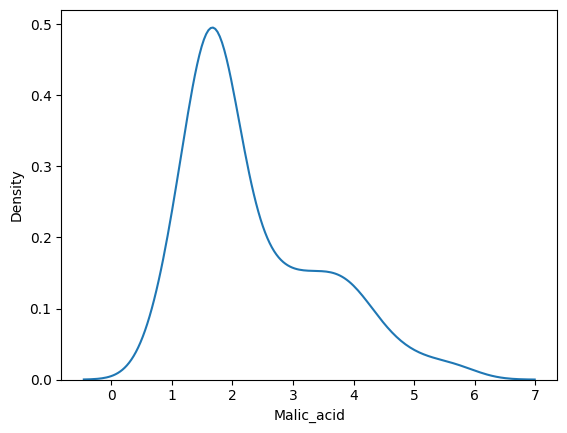

In [7]:
sns.kdeplot(df['Malic_acid'])

<Axes: xlabel='Alcohol', ylabel='Malic_acid'>

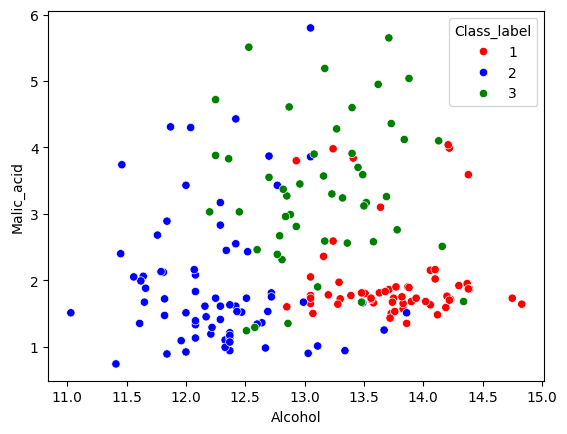

In [8]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(data=df,x=df['Alcohol'],y=df['Malic_acid'],hue=df['Class_label'],palette=color_dict)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class_label',axis=1),
                                               df['Class_label'],test_size=0.3,
                                               random_state=0)
#random_state=0, the same training and test sets are created consistently

X_train.shape, X_test.shape

((124, 2), (54, 2))

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [12]:
X_train_scaled.head()

,Alcohol,Malic_acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252


In [13]:
X_test_scaled.head()

,Alcohol,Malic_acid
0,0.728495,0.163866
1,0.473118,0.373950
2,0.360215,0.050420
3,0.680108,0.176471
4,0.543011,1.031513


In [14]:
np.round(X_train.describe(),1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [15]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic_acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


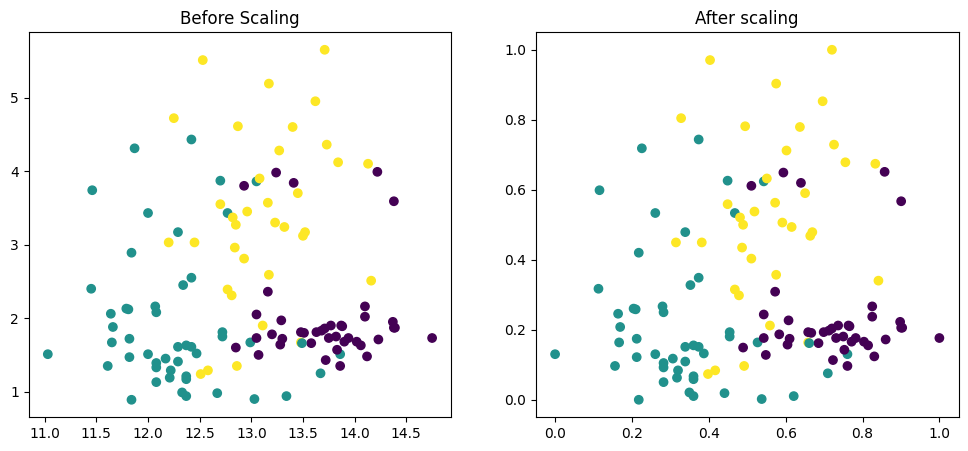

In [16]:
fig,(ax1,ax2)=plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Alcohol'],X_train['Malic_acid'],c=y_train)

ax2.set_title("After scaling")
ax2.scatter(X_train_scaled['Alcohol'],X_train_scaled['Malic_acid'],c=y_train)
plt.show()


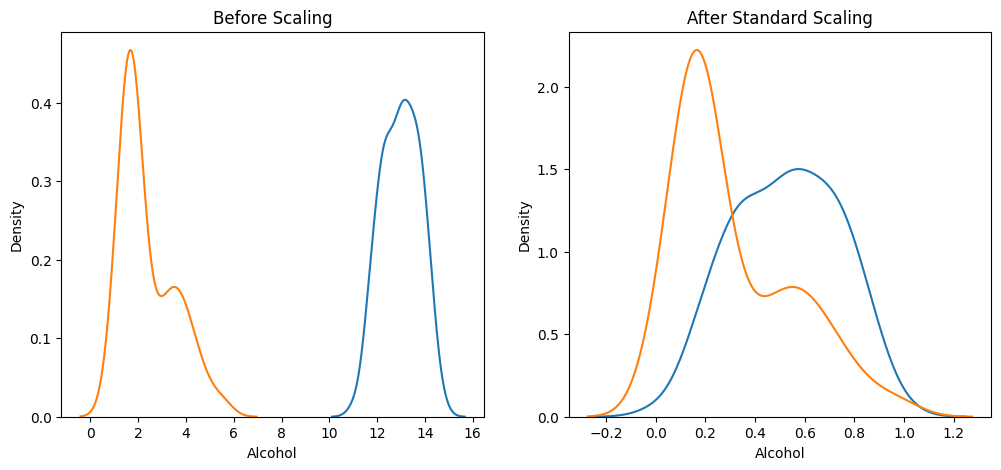

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic_acid'], ax=ax1)

ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic_acid'], ax=ax2)
plt.show()

<Axes: title={'center': 'Alcohol after scaling'}, xlabel='Alcohol', ylabel='Density'>

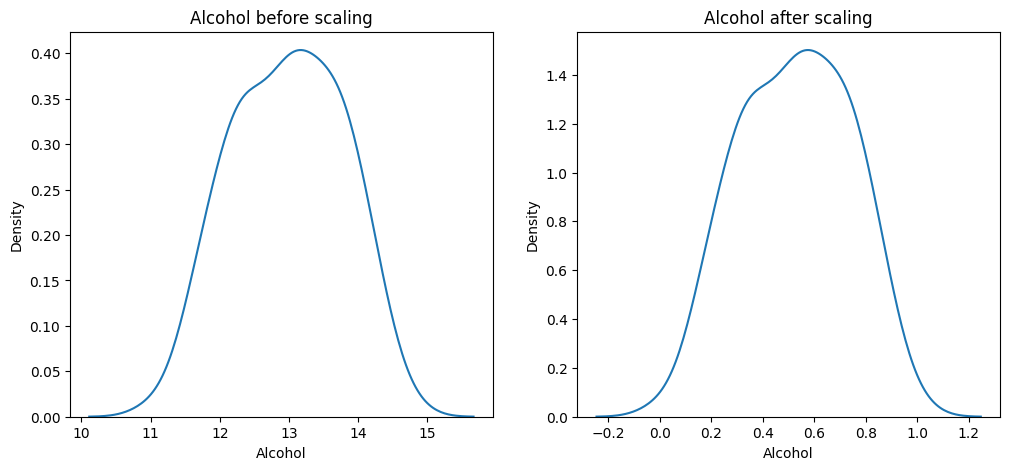

In [21]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Alcohol before scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title("Alcohol after scaling")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)

<Axes: title={'center': 'Malic Acid after scaling'}, xlabel='Malic_acid', ylabel='Density'>

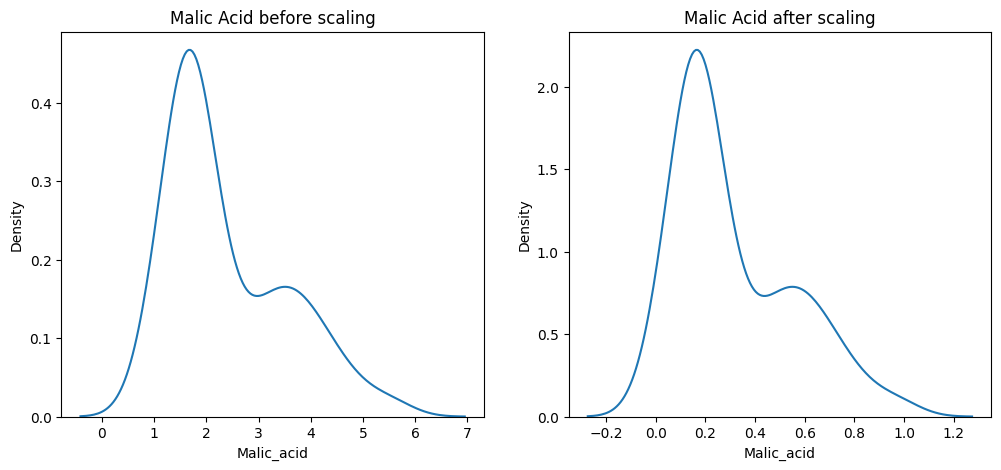

In [22]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Malic Acid before scaling")
sns.kdeplot(X_train['Malic_acid'],ax=ax1)

ax2.set_title("Malic Acid after scaling")
sns.kdeplot(X_train_scaled['Malic_acid'],ax=ax2)